In [24]:
# Importar la librería Pandas
import pandas as pd

# Dataset de https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection
ruta_archivo_sms = './'  # indica aquí la ruta al archivo
df = pd.read_table(ruta_archivo_sms + 'SMSSpamCollection.txt', sep='\t', names=['label', 'sms_message'])
# Visualización de las 5 primeras filas
df.head()

,label,sms_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
# Conversión
df['label'] = df.label.map({'ham': 0, 'spam': 1})
# Visualizar las dimensiones de los datos
df.shape

(5572, 2)

In [27]:
# Dividimos los datos en dos partes: entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['sms_message'], df['label'], random_state=1)
print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 5572
Number of rows in the training set: 4179
Number of rows in the test set: 1393


In [28]:
from sklearn.feature_extraction.text import CountVectorizer

# Creamos un objeto CountVectorizer
count_vector = CountVectorizer()

# Generamos la matriz que a partir de los datos de entrenamiento
training_data = count_vector.fit_transform(X_train)

# Transformamos los datos de prueba y devolvemos la matriz (sin generar el diccionario de características)
testing_data = count_vector.transform(X_test)

In [29]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB()

In [30]:
predictions = naive_bayes.predict(testing_data)

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))

Accuracy score:  0.9885139985642498
Precision score:  0.9720670391061452
Recall score:  0.9405405405405406
F1 score:  0.9560439560439562


1) cómo mostrar por pantalla la matriz de confusión señalada previamente (preferiblemente como “mapa de calor”).

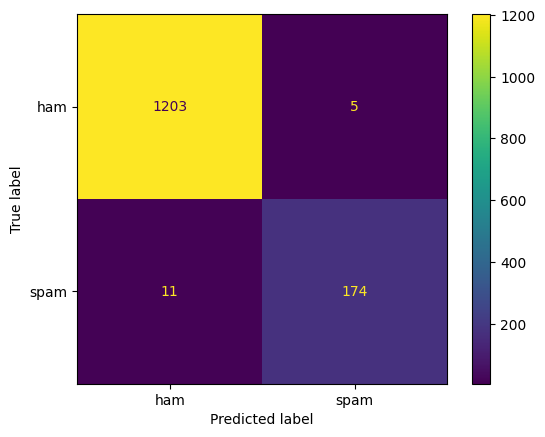

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['ham', 'spam'])

disp.plot()
plt.show()

2) cómo mostrar una tabla con las métricas anteriores (existe un método para ello).

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions, target_names=['ham', 'spam']))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1208
        spam       0.97      0.94      0.96       185

    accuracy                           0.99      1393
   macro avg       0.98      0.97      0.97      1393
weighted avg       0.99      0.99      0.99      1393


¿Qué podemos decir del modelo?, ¿es fiable cómo se comporta?

- El modelo es capaz de predecir en un alto porcentaje si un correo es spam. Pese a no ser perfecto, puede ser una herramienta fiable a la hora de detectar correos que son spam y filtrar en gran medida los correos que recibe el usuario.